# DMart Top Selling Dairy & Beverages Items

This data contains details of one day sale in DMart India

Let's discover what should we purchase today

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
dmart_df = pd.read_csv('/content/sample_data/DMart.csv')

In [39]:
dmart_df.shape #there are 5189 rows and 9 columns 

(5189, 9)

In [40]:
dmart_df.info() #looking at Dtype we have two data type i.e Object and Float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


Before performing Exploratory Data Analysi(EDA) we have to make our data clean to avoid misleading outcome 

Basic Steps would be :
*   Drop unwanted columns
*   Removing rows which have missing information for imp columns
*   Replaceing Null values with default values


In [41]:
dmart_df.drop(['Description','BreadCrumbs'],axis=1,inplace=True) #['Description','BreadCrumbs'] does not contain any useful info so we drop them

In [42]:
dmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
dtypes: float64(2), object(5)
memory usage: 283.9+ KB


In [45]:
dmart_df.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
dtype: int64

In [46]:
NameCheck = (dmart_df['Name'].isnull()) #filter condition to check null values

In [47]:
dmart_df = dmart_df.loc[~NameCheck] #reverse on filter condition to include only valid records

In [49]:
dmart_df.loc[:,'Brand'] = dmart_df['Brand'].replace({np.NaN:'NoBrand'}) #replace to default NoBrand

In [54]:
PriceCheck = (dmart_df['Price'].isnull() | dmart_df['DiscountedPrice'].isnull()) #filter condition to check null values 

In [55]:
dmart_df = dmart_df.loc[~PriceCheck] #reverse on filter condition to include only valid records

In [153]:
dmart_df.loc[:,'Category'] = dmart_df['Category'].replace({np.NaN:'Specials'}) #replace to default Sepcials

In [59]:
dmart_df.loc[:,'SubCategory'] = dmart_df['SubCategory'].replace({np.NaN:'Specials'}) #replace to default Sepcials

In [61]:
dmart_df.loc[:,'Quantity'] = dmart_df['Quantity'].replace({np.NaN:'Size XL'}) #replace done based upon analysis only for 1 record

In [62]:
dmart_df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
dtype: int64

Now our data is almost clean we can begin with some EDA

In [63]:
dmart_df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg


In [127]:
TotalSale = dmart_df['DiscountedPrice'].sum()
TotalSale

1227773.5

In [65]:
dmart_df.Category.nunique() #how much unique category do we have 

29

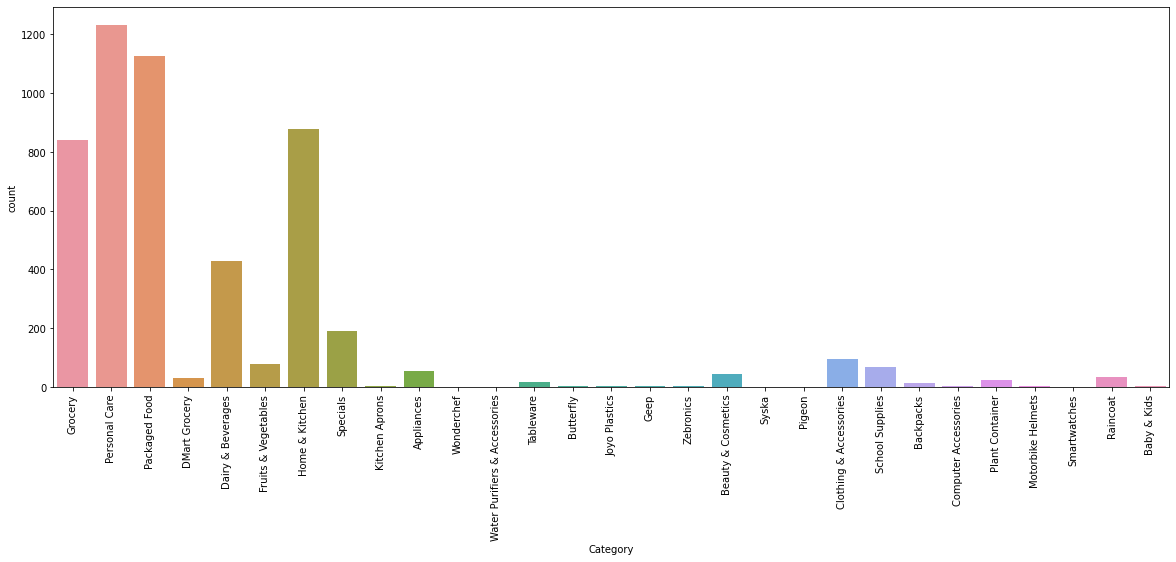

In [154]:
plt.figure(figsize=(20,7))
sns.countplot(data=dmart_df, x='Category')
plt.xticks(rotation=90)
plt.show() # this will ensure that the plot is displayed without the text

Now i wish to see for Category Dairy & Beverages which is the best selling




In [81]:
Category_filter = (dmart_df['Category'] == 'Dairy & Beverages') #we first store the filter condition in varaible 

In [82]:
dmart_df_db = dmart_df.loc[Category_filter] #based on filter condition we split our df into new df

In [84]:
dmart_df_db.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity
852,Premia Tea Masala,Premia,39.0,35.0,Dairy & Beverages,Beverages,50 gm
858,Amul Butter,Amul,255.0,245.0,Dairy & Beverages,Dairy,500 gm
859,Amul Butter,Amul,52.0,48.0,Dairy & Beverages,Dairy,100 gm
860,Amul Butter,Amul,106.0,98.0,Dairy & Beverages,Dairy,200 gm
861,Society Tea,Society,140.0,130.0,Dairy & Beverages,Beverages,250 gm


In [156]:
dmart_df_db.describe(include='all').T #describe gives descriptive summary of our df 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,429,338,Cadbury Bournvita Health Drink Refill,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,429,106,Amul,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,429.0,NaN,NaN,NaN,225.002657,227.209076,14.0,85.0,150.0,300.0,2300.0
DiscountedPrice,429.0,NaN,NaN,NaN,177.706294,183.601999,10.0,65.0,124.0,240.0,1299.0
Category,429,1,Dairy & Beverages,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubCategory,429,2,Beverages,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,429,61,1 L,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
Dairy_BeveragesSale = dmart_df_db['DiscountedPrice'].sum()
Dairy_BeveragesSale

76236.0

In [137]:
Stakes = (Dairy_BeveragesSale/TotalSale*100) # out of all the sale what does my Dairy and Beverages provides
Stakes

6.20928860249875

In [86]:
dmart_df_db['SubCategory'].value_counts() # how much subcategory it contains respectively 

Beverages    282
Dairy        147
Name: SubCategory, dtype: int64

In [94]:
Dairy_filter = (dmart_df['SubCategory'] == 'Dairy')

In [95]:
dmart_df_dairy = dmart_df_db.loc[Dairy_filter]

In [96]:
dmart_df_dairy.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity
858,Amul Butter,Amul,255.0,245.0,Dairy & Beverages,Dairy,500 gm
859,Amul Butter,Amul,52.0,48.0,Dairy & Beverages,Dairy,100 gm
860,Amul Butter,Amul,106.0,98.0,Dairy & Beverages,Dairy,200 gm
891,Nutralite Fat Spread,Nutralite,240.0,160.0,Dairy & Beverages,Dairy,500 gm
895,Mother Dairy Pasteurized Butter,Mother Dairy,255.0,216.0,Dairy & Beverages,Dairy,500 gm


In [157]:
dmart_df_dairy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,147,114,Amul Cheese Slices,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,147,22,Amul,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,147.0,NaN,NaN,NaN,163.782313,142.98096,14.0,68.0,114.0,205.0,816.0
DiscountedPrice,147.0,NaN,NaN,NaN,136.394558,124.37408,13.0,50.0,99.0,160.0,780.0
Category,147,1,Dairy & Beverages,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubCategory,147,1,Dairy,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,147,26,200 gm,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


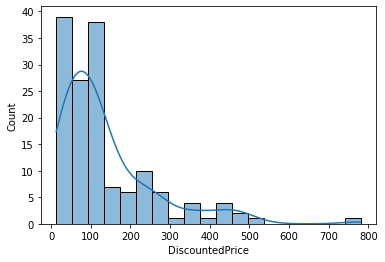

In [143]:
sns.histplot(data=dmart_df_dairy, x='DiscountedPrice', kde=True);

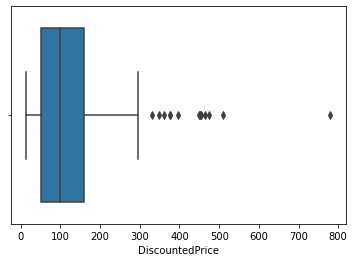

In [144]:
sns.boxplot(data=dmart_df_dairy, x='DiscountedPrice');

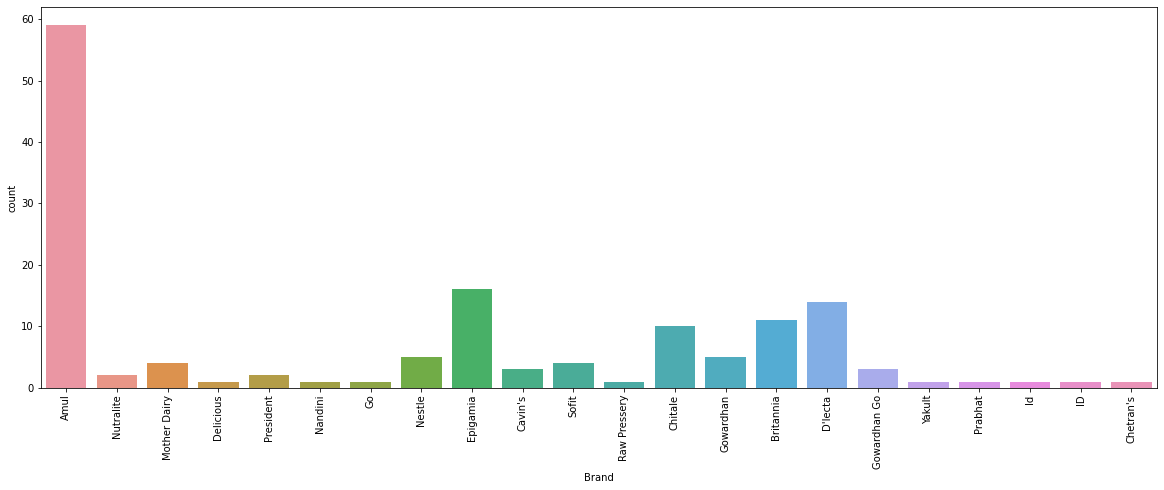

In [145]:
plt.figure(figsize=(20,7))
sns.countplot(data=dmart_df_dairy, x='Brand') #count of each brand in subcategory dairy
plt.xticks(rotation=90)
plt.show() # this will ensure that the plot is displayed without the text

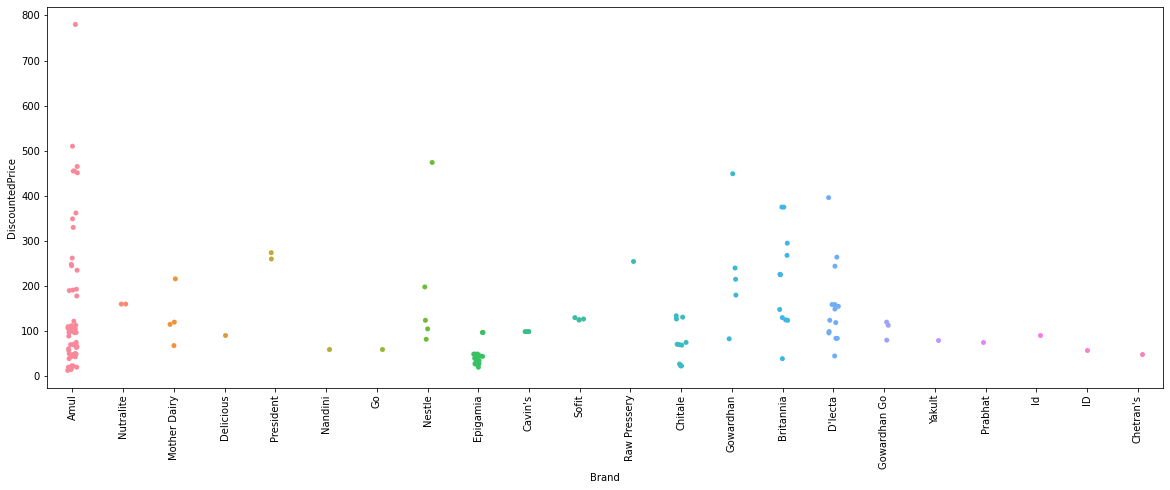

In [152]:
plt.figure(figsize=(20,7))
sns.stripplot(data=dmart_df_dairy, x='Brand', y='DiscountedPrice'); # what is more likely sale of my price in range 
plt.xticks(rotation=90)
plt.show()

In [160]:
Beverages_filter = (dmart_df['SubCategory'] == 'Beverages')

In [161]:
dmart_df_beverages = dmart_df_db.loc[Beverages_filter]

In [162]:
dmart_df_beverages.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,282,224,Cadbury Bournvita Health Drink Refill,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,282,88,Nescafe,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,282.0,NaN,NaN,NaN,256.91539,255.000919,20.0,99.0,170.0,330.0,2300.0
DiscountedPrice,282.0,NaN,NaN,NaN,199.241135,204.814225,10.0,69.25,133.0,255.0,1299.0
Category,282,1,Dairy & Beverages,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubCategory,282,1,Beverages,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,282,49,1 L,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN


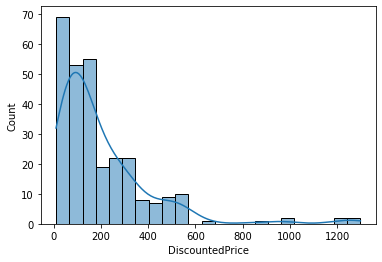

In [141]:
sns.histplot(data=dmart_df_beverages, x='DiscountedPrice', kde=True);

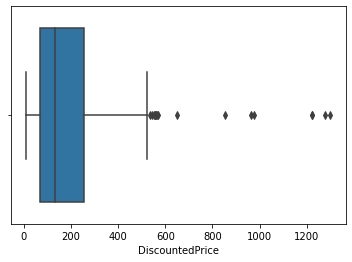

In [159]:
sns.boxplot(data=dmart_df_beverages, x='DiscountedPrice');

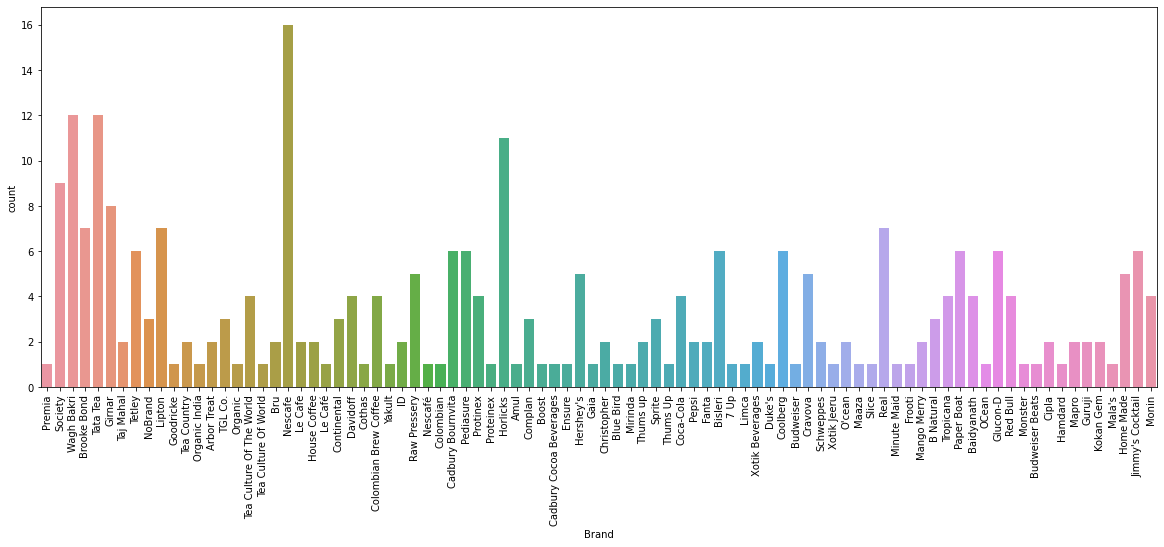

In [163]:
plt.figure(figsize=(20,7))
sns.countplot(data=dmart_df_beverages, x='Brand') #count of each brand in subcategory beverages
plt.xticks(rotation=90)
plt.show() # this will ensure that the plot is displayed without the text

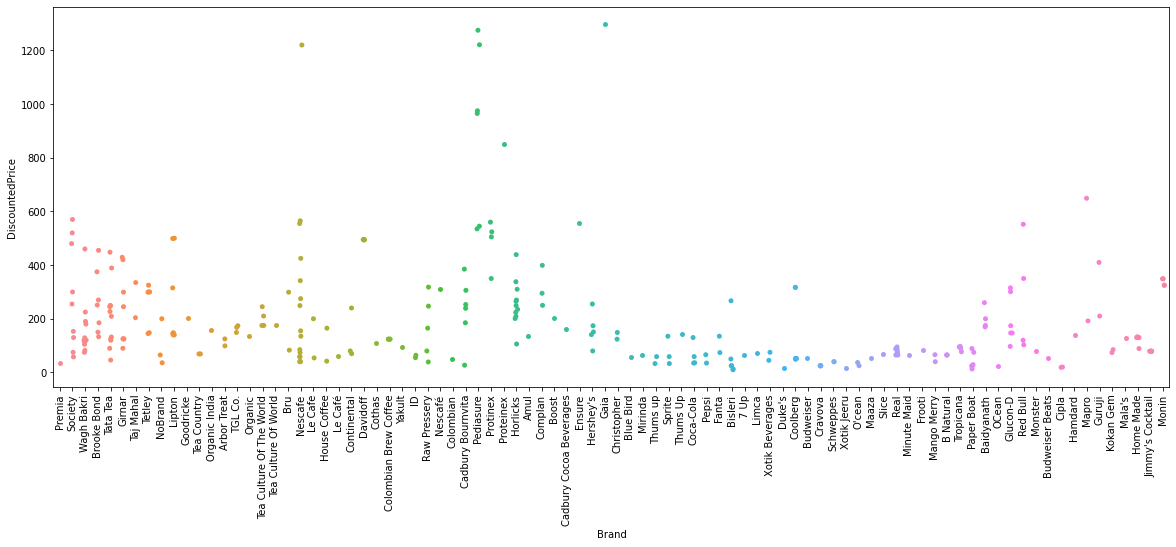

In [149]:
plt.figure(figsize=(20,7))
sns.stripplot(data=dmart_df_beverages, x='Brand', y='DiscountedPrice'); # what is more likely sale of my price in range 
plt.xticks(rotation=90)
plt.show()

In [177]:
Sales_dmart_df_beverages =  dmart_df_beverages['DiscountedPrice'].sum()
Sales_dmart_df_dairy = dmart_df_dairy['DiscountedPrice'].sum()
Dairy_BeveragesSale
Beverages_Stakes = (Sales_dmart_df_beverages/Dairy_BeveragesSale)*100
Diary_Stakes = (Sales_dmart_df_dairy/Dairy_BeveragesSale)*100

In [178]:
Beverages_Stakes

73.70008919670497

In [179]:
Diary_Stakes

26.299910803295028

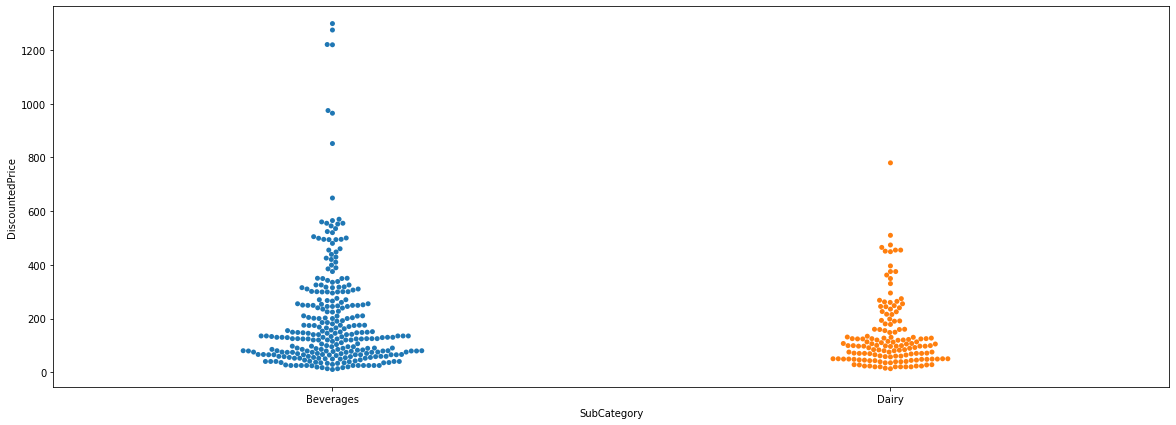

In [180]:
plt.figure(figsize=(20,7))
sns.swarmplot(data=dmart_df_db, x='SubCategory', y='DiscountedPrice'); # how much spread is there between subcategory w.r.t price 

Observations:

Out of all Category Diary and Beverages contributes overall 6.20% profit 

Between Dairy and Beverages more of the profit comes from Beverages Section

In Beverages Section the best selling brand is Nescafe with the spread of item discount price range of 10 to 1299 

In Dairy Section the best selling brand is Amul with the spread of item discount price range of 13 to 780

Further analysis can be done on this dataset using the different methods and considering different Category